In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, the just comment out this line and run this cell again
tf.enable_eager_execution()

1.14.0


In [38]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [39]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [41]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [42]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

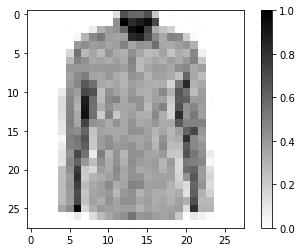

In [43]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

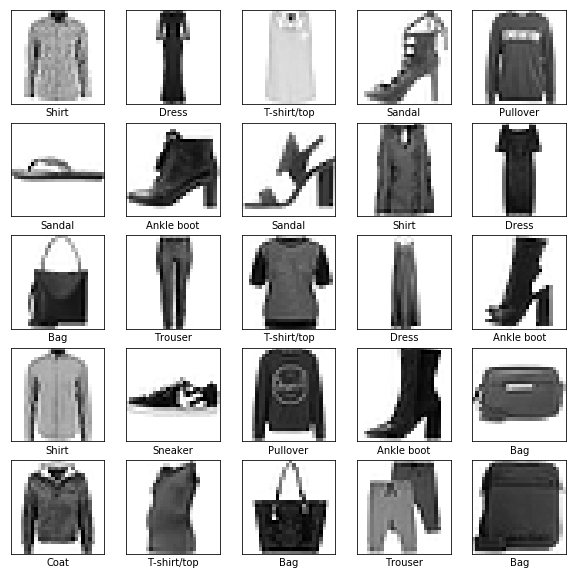

In [44]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [46]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [48]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5


 784/1875 [===========>..................] - ETA: 2:19:53 - loss: 2.2974 - acc: 0.12 - ETA: 28:16 - loss: 2.1166 - acc: 0.2875 - ETA: 15:53 - loss: 1.9409 - acc: 0.37 - ETA: 11:07 - loss: 1.7876 - acc: 0.42 - ETA: 8:35 - loss: 1.6225 - acc: 0.4743 - ETA: 7:01 - loss: 1.4998 - acc: 0.510 - ETA: 5:57 - loss: 1.4043 - acc: 0.541 - ETA: 5:11 - loss: 1.3134 - acc: 0.567 - ETA: 4:36 - loss: 1.2459 - acc: 0.584 - ETA: 4:08 - loss: 1.1998 - acc: 0.597 - ETA: 3:46 - loss: 1.1562 - acc: 0.608 - ETA: 3:28 - loss: 1.1104 - acc: 0.625 - ETA: 3:13 - loss: 1.0766 - acc: 0.635 - ETA: 3:00 - loss: 1.0441 - acc: 0.645 - ETA: 2:49 - loss: 1.0112 - acc: 0.654 - ETA: 2:39 - loss: 0.9818 - acc: 0.665 - ETA: 2:31 - loss: 0.9591 - acc: 0.669 - ETA: 2:23 - loss: 0.9381 - acc: 0.676 - ETA: 2:16 - loss: 0.9132 - acc: 0.684 - ETA: 2:10 - loss: 0.8970 - acc: 0.690 - ETA: 2:05 - loss: 0.8722 - acc: 0.700 - ETA: 2:00 - loss: 0.8578 - acc: 0.703 - ETA: 1:56 - loss: 0.8535 - acc: 0.704 - ETA: 1:51 - loss: 0.8399 - acc

1577/1875 [========================>.....] - ETA: 23s - loss: 0.4683 - acc: 0.83 - ETA: 23s - loss: 0.4679 - acc: 0.83 - ETA: 23s - loss: 0.4674 - acc: 0.83 - ETA: 23s - loss: 0.4670 - acc: 0.83 - ETA: 22s - loss: 0.4666 - acc: 0.83 - ETA: 22s - loss: 0.4658 - acc: 0.83 - ETA: 22s - loss: 0.4653 - acc: 0.83 - ETA: 22s - loss: 0.4645 - acc: 0.83 - ETA: 22s - loss: 0.4648 - acc: 0.83 - ETA: 22s - loss: 0.4641 - acc: 0.83 - ETA: 22s - loss: 0.4637 - acc: 0.83 - ETA: 22s - loss: 0.4631 - acc: 0.83 - ETA: 21s - loss: 0.4624 - acc: 0.83 - ETA: 21s - loss: 0.4621 - acc: 0.83 - ETA: 21s - loss: 0.4611 - acc: 0.83 - ETA: 21s - loss: 0.4610 - acc: 0.83 - ETA: 21s - loss: 0.4603 - acc: 0.83 - ETA: 21s - loss: 0.4601 - acc: 0.83 - ETA: 21s - loss: 0.4594 - acc: 0.83 - ETA: 21s - loss: 0.4589 - acc: 0.83 - ETA: 21s - loss: 0.4589 - acc: 0.83 - ETA: 21s - loss: 0.4585 - acc: 0.83 - ETA: 20s - loss: 0.4578 - acc: 0.83 - ETA: 20s - loss: 0.4575 - acc: 0.83 - ETA: 20s - loss: 0.4570 - acc: 0.83 - ETA: 

1875/1875 [==============================] - ETA: 5s - loss: 0.3985 - acc: 0.860 - ETA: 5s - loss: 0.3981 - acc: 0.860 - ETA: 5s - loss: 0.3978 - acc: 0.860 - ETA: 5s - loss: 0.3978 - acc: 0.860 - ETA: 5s - loss: 0.3975 - acc: 0.860 - ETA: 5s - loss: 0.3974 - acc: 0.860 - ETA: 5s - loss: 0.3971 - acc: 0.860 - ETA: 4s - loss: 0.3968 - acc: 0.860 - ETA: 4s - loss: 0.3964 - acc: 0.860 - ETA: 4s - loss: 0.3961 - acc: 0.860 - ETA: 4s - loss: 0.3961 - acc: 0.860 - ETA: 4s - loss: 0.3957 - acc: 0.860 - ETA: 4s - loss: 0.3955 - acc: 0.860 - ETA: 4s - loss: 0.3955 - acc: 0.860 - ETA: 4s - loss: 0.3952 - acc: 0.860 - ETA: 4s - loss: 0.3950 - acc: 0.861 - ETA: 4s - loss: 0.3948 - acc: 0.861 - ETA: 4s - loss: 0.3947 - acc: 0.861 - ETA: 4s - loss: 0.3945 - acc: 0.861 - ETA: 4s - loss: 0.3944 - acc: 0.861 - ETA: 3s - loss: 0.3942 - acc: 0.861 - ETA: 3s - loss: 0.3940 - acc: 0.861 - ETA: 3s - loss: 0.3937 - acc: 0.861 - ETA: 3s - loss: 0.3935 - acc: 0.861 - ETA: 3s - loss: 0.3933 - acc: 0.861 - ETA: 

 803/1875 [===========>..................] - ETA: 1:18 - loss: 0.1570 - acc: 0.968 - ETA: 45s - loss: 0.2558 - acc: 0.929 - ETA: 37s - loss: 0.2554 - acc: 0.90 - ETA: 34s - loss: 0.2590 - acc: 0.90 - ETA: 32s - loss: 0.2709 - acc: 0.89 - ETA: 31s - loss: 0.2658 - acc: 0.89 - ETA: 30s - loss: 0.2643 - acc: 0.89 - ETA: 30s - loss: 0.2880 - acc: 0.88 - ETA: 29s - loss: 0.2922 - acc: 0.89 - ETA: 29s - loss: 0.3072 - acc: 0.88 - ETA: 29s - loss: 0.2963 - acc: 0.88 - ETA: 28s - loss: 0.2955 - acc: 0.88 - ETA: 28s - loss: 0.2985 - acc: 0.88 - ETA: 28s - loss: 0.2984 - acc: 0.88 - ETA: 28s - loss: 0.2967 - acc: 0.88 - ETA: 28s - loss: 0.2915 - acc: 0.88 - ETA: 27s - loss: 0.2966 - acc: 0.88 - ETA: 27s - loss: 0.2953 - acc: 0.88 - ETA: 27s - loss: 0.2949 - acc: 0.88 - ETA: 27s - loss: 0.2924 - acc: 0.88 - ETA: 27s - loss: 0.2975 - acc: 0.88 - ETA: 27s - loss: 0.2974 - acc: 0.88 - ETA: 27s - loss: 0.2980 - acc: 0.88 - ETA: 27s - loss: 0.2992 - acc: 0.88 - ETA: 27s - loss: 0.2993 - acc: 0.88 - ET

1644/1875 [=========================>....] - ETA: 16s - loss: 0.2802 - acc: 0.89 - ETA: 16s - loss: 0.2805 - acc: 0.89 - ETA: 16s - loss: 0.2802 - acc: 0.89 - ETA: 16s - loss: 0.2798 - acc: 0.89 - ETA: 16s - loss: 0.2800 - acc: 0.89 - ETA: 16s - loss: 0.2799 - acc: 0.89 - ETA: 16s - loss: 0.2797 - acc: 0.89 - ETA: 16s - loss: 0.2799 - acc: 0.89 - ETA: 16s - loss: 0.2798 - acc: 0.89 - ETA: 16s - loss: 0.2794 - acc: 0.89 - ETA: 16s - loss: 0.2793 - acc: 0.89 - ETA: 15s - loss: 0.2789 - acc: 0.89 - ETA: 15s - loss: 0.2789 - acc: 0.89 - ETA: 15s - loss: 0.2788 - acc: 0.89 - ETA: 15s - loss: 0.2785 - acc: 0.89 - ETA: 15s - loss: 0.2781 - acc: 0.90 - ETA: 15s - loss: 0.2782 - acc: 0.89 - ETA: 15s - loss: 0.2780 - acc: 0.90 - ETA: 15s - loss: 0.2781 - acc: 0.90 - ETA: 15s - loss: 0.2785 - acc: 0.89 - ETA: 15s - loss: 0.2782 - acc: 0.90 - ETA: 15s - loss: 0.2786 - acc: 0.89 - ETA: 15s - loss: 0.2789 - acc: 0.89 - ETA: 15s - loss: 0.2785 - acc: 0.90 - ETA: 15s - loss: 0.2785 - acc: 0.90 - ETA: 

1875/1875 [==============================] - ETA: 3s - loss: 0.2666 - acc: 0.902 - ETA: 3s - loss: 0.2666 - acc: 0.902 - ETA: 3s - loss: 0.2666 - acc: 0.902 - ETA: 3s - loss: 0.2664 - acc: 0.902 - ETA: 3s - loss: 0.2663 - acc: 0.902 - ETA: 3s - loss: 0.2660 - acc: 0.903 - ETA: 3s - loss: 0.2659 - acc: 0.903 - ETA: 3s - loss: 0.2660 - acc: 0.903 - ETA: 2s - loss: 0.2659 - acc: 0.903 - ETA: 2s - loss: 0.2658 - acc: 0.903 - ETA: 2s - loss: 0.2657 - acc: 0.903 - ETA: 2s - loss: 0.2657 - acc: 0.903 - ETA: 2s - loss: 0.2656 - acc: 0.903 - ETA: 2s - loss: 0.2653 - acc: 0.903 - ETA: 2s - loss: 0.2654 - acc: 0.903 - ETA: 2s - loss: 0.2653 - acc: 0.903 - ETA: 2s - loss: 0.2655 - acc: 0.903 - ETA: 2s - loss: 0.2654 - acc: 0.903 - ETA: 2s - loss: 0.2656 - acc: 0.903 - ETA: 2s - loss: 0.2660 - acc: 0.903 - ETA: 2s - loss: 0.2659 - acc: 0.903 - ETA: 2s - loss: 0.2662 - acc: 0.903 - ETA: 2s - loss: 0.2661 - acc: 0.903 - ETA: 2s - loss: 0.2659 - acc: 0.903 - ETA: 1s - loss: 0.2658 - acc: 0.903 - ETA: 

 845/1875 [============>.................] - ETA: 1:22 - loss: 0.1708 - acc: 0.937 - ETA: 39s - loss: 0.2098 - acc: 0.943 - ETA: 34s - loss: 0.2429 - acc: 0.91 - ETA: 32s - loss: 0.2444 - acc: 0.91 - ETA: 31s - loss: 0.2373 - acc: 0.91 - ETA: 30s - loss: 0.2254 - acc: 0.92 - ETA: 29s - loss: 0.2408 - acc: 0.91 - ETA: 29s - loss: 0.2489 - acc: 0.91 - ETA: 29s - loss: 0.2483 - acc: 0.91 - ETA: 28s - loss: 0.2383 - acc: 0.91 - ETA: 28s - loss: 0.2459 - acc: 0.91 - ETA: 28s - loss: 0.2368 - acc: 0.91 - ETA: 27s - loss: 0.2337 - acc: 0.91 - ETA: 27s - loss: 0.2358 - acc: 0.91 - ETA: 27s - loss: 0.2341 - acc: 0.91 - ETA: 27s - loss: 0.2286 - acc: 0.91 - ETA: 27s - loss: 0.2298 - acc: 0.91 - ETA: 27s - loss: 0.2295 - acc: 0.91 - ETA: 27s - loss: 0.2271 - acc: 0.91 - ETA: 26s - loss: 0.2303 - acc: 0.91 - ETA: 26s - loss: 0.2280 - acc: 0.91 - ETA: 26s - loss: 0.2283 - acc: 0.91 - ETA: 26s - loss: 0.2259 - acc: 0.91 - ETA: 26s - loss: 0.2238 - acc: 0.91 - ETA: 26s - loss: 0.2257 - acc: 0.91 - ET

1694/1875 [==========================>...] - ETA: 15s - loss: 0.2184 - acc: 0.92 - ETA: 15s - loss: 0.2187 - acc: 0.92 - ETA: 15s - loss: 0.2185 - acc: 0.92 - ETA: 15s - loss: 0.2184 - acc: 0.92 - ETA: 15s - loss: 0.2184 - acc: 0.92 - ETA: 14s - loss: 0.2182 - acc: 0.92 - ETA: 14s - loss: 0.2180 - acc: 0.92 - ETA: 14s - loss: 0.2175 - acc: 0.92 - ETA: 14s - loss: 0.2177 - acc: 0.92 - ETA: 14s - loss: 0.2178 - acc: 0.92 - ETA: 14s - loss: 0.2178 - acc: 0.92 - ETA: 14s - loss: 0.2174 - acc: 0.92 - ETA: 14s - loss: 0.2172 - acc: 0.92 - ETA: 14s - loss: 0.2168 - acc: 0.92 - ETA: 14s - loss: 0.2172 - acc: 0.92 - ETA: 14s - loss: 0.2173 - acc: 0.92 - ETA: 14s - loss: 0.2173 - acc: 0.92 - ETA: 14s - loss: 0.2169 - acc: 0.92 - ETA: 14s - loss: 0.2170 - acc: 0.92 - ETA: 14s - loss: 0.2169 - acc: 0.92 - ETA: 14s - loss: 0.2167 - acc: 0.92 - ETA: 14s - loss: 0.2166 - acc: 0.92 - ETA: 13s - loss: 0.2168 - acc: 0.92 - ETA: 13s - loss: 0.2170 - acc: 0.92 - ETA: 13s - loss: 0.2170 - acc: 0.92 - ETA: 

1875/1875 [==============================] - ETA: 2s - loss: 0.2095 - acc: 0.923 - ETA: 2s - loss: 0.2094 - acc: 0.923 - ETA: 2s - loss: 0.2093 - acc: 0.923 - ETA: 2s - loss: 0.2094 - acc: 0.923 - ETA: 2s - loss: 0.2091 - acc: 0.923 - ETA: 2s - loss: 0.2090 - acc: 0.923 - ETA: 2s - loss: 0.2090 - acc: 0.923 - ETA: 2s - loss: 0.2089 - acc: 0.923 - ETA: 2s - loss: 0.2091 - acc: 0.923 - ETA: 2s - loss: 0.2091 - acc: 0.923 - ETA: 2s - loss: 0.2089 - acc: 0.923 - ETA: 1s - loss: 0.2095 - acc: 0.923 - ETA: 1s - loss: 0.2096 - acc: 0.923 - ETA: 1s - loss: 0.2095 - acc: 0.923 - ETA: 1s - loss: 0.2094 - acc: 0.923 - ETA: 1s - loss: 0.2093 - acc: 0.923 - ETA: 1s - loss: 0.2092 - acc: 0.923 - ETA: 1s - loss: 0.2092 - acc: 0.923 - ETA: 1s - loss: 0.2091 - acc: 0.923 - ETA: 1s - loss: 0.2091 - acc: 0.923 - ETA: 1s - loss: 0.2093 - acc: 0.923 - ETA: 1s - loss: 0.2094 - acc: 0.923 - ETA: 1s - loss: 0.2093 - acc: 0.923 - ETA: 1s - loss: 0.2094 - acc: 0.923 - ETA: 1s - loss: 0.2098 - acc: 0.923 - ETA: 

 844/1875 [============>.................] - ETA: 1:24 - loss: 0.1596 - acc: 0.937 - ETA: 45s - loss: 0.1689 - acc: 0.937 - ETA: 37s - loss: 0.2094 - acc: 0.91 - ETA: 34s - loss: 0.2083 - acc: 0.92 - ETA: 32s - loss: 0.2252 - acc: 0.91 - ETA: 31s - loss: 0.2174 - acc: 0.91 - ETA: 30s - loss: 0.2132 - acc: 0.91 - ETA: 29s - loss: 0.2132 - acc: 0.91 - ETA: 29s - loss: 0.2096 - acc: 0.92 - ETA: 29s - loss: 0.2174 - acc: 0.91 - ETA: 28s - loss: 0.2199 - acc: 0.91 - ETA: 28s - loss: 0.2167 - acc: 0.91 - ETA: 28s - loss: 0.2121 - acc: 0.92 - ETA: 28s - loss: 0.2119 - acc: 0.92 - ETA: 27s - loss: 0.2116 - acc: 0.92 - ETA: 27s - loss: 0.2093 - acc: 0.92 - ETA: 27s - loss: 0.2094 - acc: 0.92 - ETA: 27s - loss: 0.2110 - acc: 0.92 - ETA: 27s - loss: 0.2088 - acc: 0.92 - ETA: 27s - loss: 0.2121 - acc: 0.91 - ETA: 26s - loss: 0.2112 - acc: 0.91 - ETA: 26s - loss: 0.2103 - acc: 0.92 - ETA: 26s - loss: 0.2085 - acc: 0.92 - ETA: 26s - loss: 0.2058 - acc: 0.92 - ETA: 26s - loss: 0.2059 - acc: 0.92 - ET

1691/1875 [==========================>...] - ETA: 15s - loss: 0.1915 - acc: 0.92 - ETA: 15s - loss: 0.1916 - acc: 0.92 - ETA: 14s - loss: 0.1912 - acc: 0.92 - ETA: 14s - loss: 0.1911 - acc: 0.92 - ETA: 14s - loss: 0.1911 - acc: 0.92 - ETA: 14s - loss: 0.1910 - acc: 0.92 - ETA: 14s - loss: 0.1912 - acc: 0.92 - ETA: 14s - loss: 0.1914 - acc: 0.92 - ETA: 14s - loss: 0.1917 - acc: 0.92 - ETA: 14s - loss: 0.1921 - acc: 0.92 - ETA: 14s - loss: 0.1922 - acc: 0.92 - ETA: 14s - loss: 0.1925 - acc: 0.92 - ETA: 14s - loss: 0.1925 - acc: 0.92 - ETA: 14s - loss: 0.1923 - acc: 0.92 - ETA: 14s - loss: 0.1922 - acc: 0.92 - ETA: 14s - loss: 0.1921 - acc: 0.92 - ETA: 14s - loss: 0.1924 - acc: 0.92 - ETA: 14s - loss: 0.1925 - acc: 0.92 - ETA: 14s - loss: 0.1922 - acc: 0.92 - ETA: 13s - loss: 0.1922 - acc: 0.92 - ETA: 13s - loss: 0.1919 - acc: 0.92 - ETA: 13s - loss: 0.1914 - acc: 0.92 - ETA: 13s - loss: 0.1911 - acc: 0.92 - ETA: 13s - loss: 0.1917 - acc: 0.92 - ETA: 13s - loss: 0.1915 - acc: 0.92 - ETA: 

1875/1875 [==============================] - ETA: 2s - loss: 0.1855 - acc: 0.932 - ETA: 2s - loss: 0.1854 - acc: 0.932 - ETA: 2s - loss: 0.1854 - acc: 0.932 - ETA: 2s - loss: 0.1853 - acc: 0.932 - ETA: 2s - loss: 0.1853 - acc: 0.932 - ETA: 2s - loss: 0.1854 - acc: 0.932 - ETA: 2s - loss: 0.1854 - acc: 0.932 - ETA: 2s - loss: 0.1854 - acc: 0.932 - ETA: 2s - loss: 0.1854 - acc: 0.932 - ETA: 2s - loss: 0.1855 - acc: 0.932 - ETA: 2s - loss: 0.1855 - acc: 0.932 - ETA: 2s - loss: 0.1855 - acc: 0.932 - ETA: 1s - loss: 0.1856 - acc: 0.932 - ETA: 1s - loss: 0.1855 - acc: 0.932 - ETA: 1s - loss: 0.1854 - acc: 0.932 - ETA: 1s - loss: 0.1853 - acc: 0.932 - ETA: 1s - loss: 0.1854 - acc: 0.932 - ETA: 1s - loss: 0.1852 - acc: 0.932 - ETA: 1s - loss: 0.1852 - acc: 0.932 - ETA: 1s - loss: 0.1850 - acc: 0.932 - ETA: 1s - loss: 0.1850 - acc: 0.932 - ETA: 1s - loss: 0.1850 - acc: 0.932 - ETA: 1s - loss: 0.1851 - acc: 0.932 - ETA: 1s - loss: 0.1850 - acc: 0.932 - ETA: 1s - loss: 0.1849 - acc: 0.932 - ETA: 

 851/1875 [============>.................] - ETA: 1:20 - loss: 0.0823 - acc: 1.000 - ETA: 37s - loss: 0.1628 - acc: 0.950 - ETA: 32s - loss: 0.1683 - acc: 0.95 - ETA: 30s - loss: 0.1665 - acc: 0.95 - ETA: 29s - loss: 0.1643 - acc: 0.94 - ETA: 28s - loss: 0.1513 - acc: 0.95 - ETA: 28s - loss: 0.1523 - acc: 0.95 - ETA: 27s - loss: 0.1541 - acc: 0.95 - ETA: 27s - loss: 0.1567 - acc: 0.94 - ETA: 27s - loss: 0.1547 - acc: 0.94 - ETA: 26s - loss: 0.1581 - acc: 0.94 - ETA: 26s - loss: 0.1628 - acc: 0.94 - ETA: 26s - loss: 0.1604 - acc: 0.94 - ETA: 26s - loss: 0.1602 - acc: 0.94 - ETA: 26s - loss: 0.1595 - acc: 0.94 - ETA: 25s - loss: 0.1631 - acc: 0.94 - ETA: 25s - loss: 0.1626 - acc: 0.94 - ETA: 25s - loss: 0.1647 - acc: 0.94 - ETA: 25s - loss: 0.1614 - acc: 0.94 - ETA: 25s - loss: 0.1638 - acc: 0.94 - ETA: 25s - loss: 0.1633 - acc: 0.94 - ETA: 25s - loss: 0.1634 - acc: 0.94 - ETA: 25s - loss: 0.1656 - acc: 0.94 - ETA: 25s - loss: 0.1673 - acc: 0.93 - ETA: 25s - loss: 0.1690 - acc: 0.93 - ET

1702/1875 [==========================>...] - ETA: 14s - loss: 0.1665 - acc: 0.93 - ETA: 14s - loss: 0.1663 - acc: 0.93 - ETA: 14s - loss: 0.1662 - acc: 0.93 - ETA: 14s - loss: 0.1660 - acc: 0.93 - ETA: 14s - loss: 0.1661 - acc: 0.93 - ETA: 14s - loss: 0.1659 - acc: 0.94 - ETA: 14s - loss: 0.1660 - acc: 0.94 - ETA: 14s - loss: 0.1662 - acc: 0.93 - ETA: 14s - loss: 0.1661 - acc: 0.93 - ETA: 14s - loss: 0.1660 - acc: 0.94 - ETA: 14s - loss: 0.1660 - acc: 0.94 - ETA: 14s - loss: 0.1658 - acc: 0.94 - ETA: 14s - loss: 0.1662 - acc: 0.93 - ETA: 14s - loss: 0.1661 - acc: 0.93 - ETA: 14s - loss: 0.1659 - acc: 0.94 - ETA: 14s - loss: 0.1658 - acc: 0.94 - ETA: 13s - loss: 0.1656 - acc: 0.94 - ETA: 13s - loss: 0.1656 - acc: 0.94 - ETA: 13s - loss: 0.1657 - acc: 0.94 - ETA: 13s - loss: 0.1655 - acc: 0.94 - ETA: 13s - loss: 0.1657 - acc: 0.94 - ETA: 13s - loss: 0.1654 - acc: 0.94 - ETA: 13s - loss: 0.1652 - acc: 0.94 - ETA: 13s - loss: 0.1650 - acc: 0.94 - ETA: 13s - loss: 0.1648 - acc: 0.94 - ETA: 

1875/1875 [==============================] - ETA: 2s - loss: 0.1580 - acc: 0.942 - ETA: 2s - loss: 0.1580 - acc: 0.942 - ETA: 2s - loss: 0.1579 - acc: 0.942 - ETA: 2s - loss: 0.1579 - acc: 0.942 - ETA: 2s - loss: 0.1577 - acc: 0.942 - ETA: 2s - loss: 0.1576 - acc: 0.942 - ETA: 2s - loss: 0.1576 - acc: 0.942 - ETA: 2s - loss: 0.1575 - acc: 0.942 - ETA: 1s - loss: 0.1578 - acc: 0.942 - ETA: 1s - loss: 0.1577 - acc: 0.942 - ETA: 1s - loss: 0.1578 - acc: 0.942 - ETA: 1s - loss: 0.1578 - acc: 0.942 - ETA: 1s - loss: 0.1579 - acc: 0.942 - ETA: 1s - loss: 0.1579 - acc: 0.942 - ETA: 1s - loss: 0.1578 - acc: 0.942 - ETA: 1s - loss: 0.1579 - acc: 0.942 - ETA: 1s - loss: 0.1579 - acc: 0.942 - ETA: 1s - loss: 0.1578 - acc: 0.942 - ETA: 1s - loss: 0.1577 - acc: 0.942 - ETA: 1s - loss: 0.1577 - acc: 0.942 - ETA: 1s - loss: 0.1577 - acc: 0.942 - ETA: 1s - loss: 0.1577 - acc: 0.942 - ETA: 1s - loss: 0.1575 - acc: 0.942 - ETA: 1s - loss: 0.1575 - acc: 0.942 - ETA: 1s - loss: 0.1575 - acc: 0.942 - ETA: 

In [49]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print('\nAccuracy on test dataset:', test_accuracy)

    191/Unknown - 0s 72ms/step - loss: 0.0917 - acc: 0.968 - 0s 40ms/step - loss: 0.2112 - acc: 0.937 - 0s 30ms/step - loss: 0.1985 - acc: 0.937 - 0s 25ms/step - loss: 0.1634 - acc: 0.953 - 0s 22ms/step - loss: 0.1738 - acc: 0.950 - 0s 20ms/step - loss: 0.1677 - acc: 0.953 - 0s 19ms/step - loss: 0.1516 - acc: 0.959 - 0s 18ms/step - loss: 0.1844 - acc: 0.945 - 0s 17ms/step - loss: 0.2178 - acc: 0.930 - 0s 16ms/step - loss: 0.2192 - acc: 0.931 - 0s 16ms/step - loss: 0.2331 - acc: 0.923 - 0s 15ms/step - loss: 0.2210 - acc: 0.929 - 0s 15ms/step - loss: 0.2103 - acc: 0.932 - 0s 14ms/step - loss: 0.1997 - acc: 0.933 - 0s 14ms/step - loss: 0.1975 - acc: 0.935 - 0s 14ms/step - loss: 0.1964 - acc: 0.933 - 0s 13ms/step - loss: 0.1906 - acc: 0.932 - 0s 13ms/step - loss: 0.1874 - acc: 0.934 - 0s 13ms/step - loss: 0.1873 - acc: 0.932 - 0s 13ms/step - loss: 0.1845 - acc: 0.934 - 0s 13ms/step - loss: 0.1969 - acc: 0.930 - 0s 13ms/step - loss: 0.1890 - acc: 0.933 - 0s 12ms/step - loss: 0.1896 - acc: 0

    313/Unknown - 2s 10ms/step - loss: 0.2404 - acc: 0.917 - 2s 10ms/step - loss: 0.2404 - acc: 0.917 - 2s 10ms/step - loss: 0.2408 - acc: 0.917 - 2s 10ms/step - loss: 0.2432 - acc: 0.916 - 2s 10ms/step - loss: 0.2436 - acc: 0.916 - 2s 10ms/step - loss: 0.2446 - acc: 0.916 - 2s 10ms/step - loss: 0.2440 - acc: 0.916 - 2s 10ms/step - loss: 0.2461 - acc: 0.915 - 2s 10ms/step - loss: 0.2455 - acc: 0.915 - 2s 10ms/step - loss: 0.2455 - acc: 0.915 - 2s 10ms/step - loss: 0.2450 - acc: 0.916 - 2s 10ms/step - loss: 0.2445 - acc: 0.916 - 2s 10ms/step - loss: 0.2444 - acc: 0.916 - 2s 10ms/step - loss: 0.2443 - acc: 0.916 - 2s 10ms/step - loss: 0.2446 - acc: 0.916 - 2s 10ms/step - loss: 0.2445 - acc: 0.916 - 2s 10ms/step - loss: 0.2464 - acc: 0.915 - 2s 10ms/step - loss: 0.2463 - acc: 0.915 - 2s 10ms/step - loss: 0.2464 - acc: 0.915 - 2s 10ms/step - loss: 0.2455 - acc: 0.916 - 2s 10ms/step - loss: 0.2447 - acc: 0.916 - 2s 10ms/step - loss: 0.2447 - acc: 0.916 - 2s 10ms/step - loss: 0.2440 - acc: 0

In [50]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [51]:
predictions.shape


(32, 10)

In [52]:
predictions[0]

array([5.7075973e-05, 1.9461866e-06, 1.9134812e-03, 2.2703265e-04,
       1.4279886e-01, 8.1947739e-08, 8.5499984e-01, 1.0664755e-09,
       1.1081784e-06, 4.7393061e-07], dtype=float32)

In [53]:
np.argmax(predictions[0])

6

In [54]:
test_labels[0]

6

In [55]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

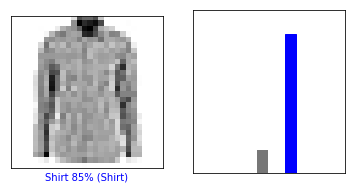

In [56]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

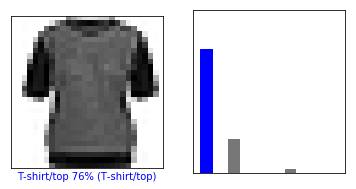

In [57]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

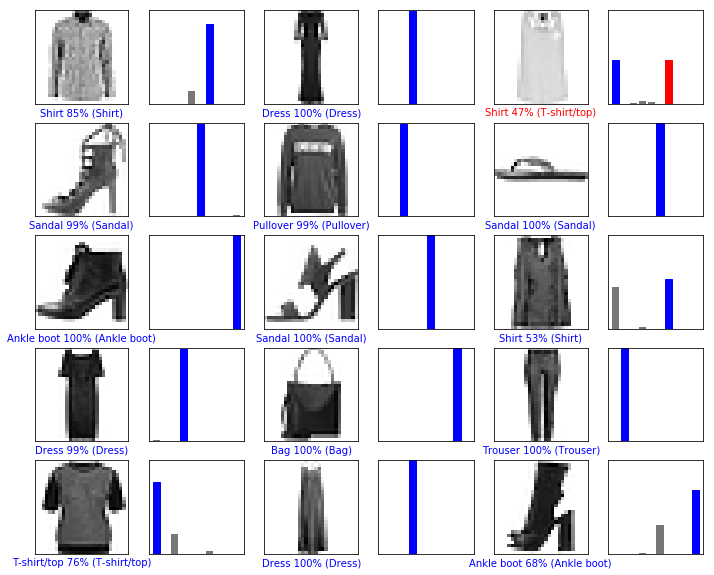

In [58]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [33]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [34]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [35]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.2065352e-05 3.1751517e-07 5.0228378e-03 2.1517442e-06 3.8701400e-01
  9.8419598e-08 6.0794812e-01 2.7239763e-10 2.9028106e-07 1.5028394e-07]]


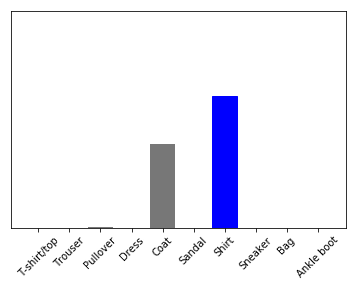

In [36]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [37]:
np.argmax(predictions_single[0])

6